# Basic Example

In [30]:
import time
import dask
from dask import delayed

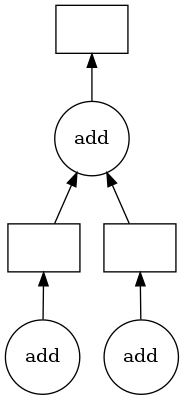

In [31]:
@delayed
def add(a, b):
    return a + b

result = add(add(1,1), add(1,1))
result.visualize() 

In [32]:
result.compute()

4

# Using Data Frames

In [13]:
import dask.dataframe as dd

df = dd.read_csv(
    "s3://eliiza-sydney-datasets-nyc-tlc/trip data/yellow_tripdata_2012-01.csv", # 2.28 GB
    storage_options={'anon': False, 'use_ssl': False})
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2012-01-10 23:55:50,2012-01-11 00:03:39,1,1.7,-73.994693,40.725031,1,N,-73.975951,40.730781,CRD,6.9,0.5,0.5,1.00,0.0,8.90
1,CMT,2012-01-11 19:18:25,2012-01-11 19:26:10,1,1.1,-73.987955,40.752947,1,N,-73.994532,40.761040,CSH,6.1,1.0,0.5,0.00,0.0,7.60
2,CMT,2012-01-11 19:19:19,2012-01-11 19:48:15,2,18.0,-73.783093,40.648550,2,N,-73.996134,40.747624,CRD,45.0,0.0,0.5,10.06,4.8,60.36
3,CMT,2012-01-11 19:19:21,2012-01-11 19:27:00,1,1.7,-73.967515,40.758454,1,N,-73.956583,40.779903,CRD,6.9,1.0,0.5,1.00,0.0,9.40
4,CMT,2012-01-11 14:38:15,2012-01-11 14:43:51,1,1.2,-74.011315,40.711449,1,N,-74.002872,40.728131,CSH,5.7,0.0,0.5,0.00,0.0,6.20


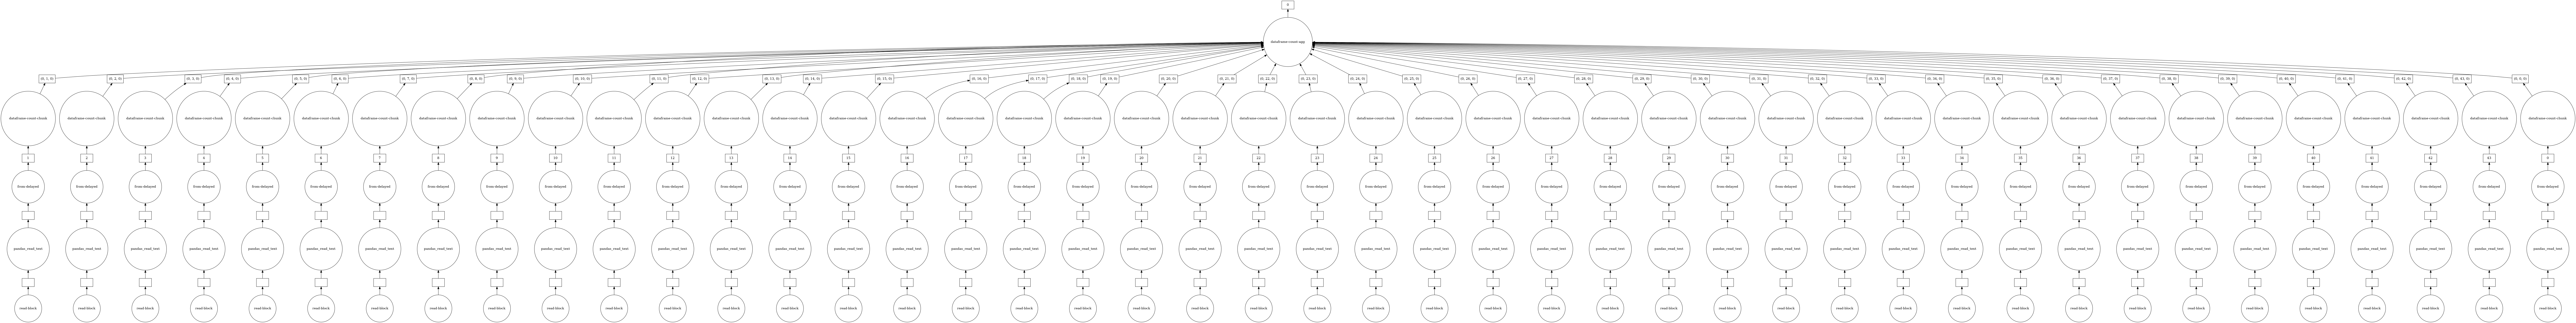

In [14]:
df.count().visualize() 

In [7]:
start = time.time()
print(df.count().compute())
print(time.time() - start)

vendor_id             14969132
pickup_datetime       14969132
dropoff_datetime      14969132
passenger_count       14969132
trip_distance         14969132
pickup_longitude      14969132
pickup_latitude       14969132
rate_code             14969132
store_and_fwd_flag     7653218
dropoff_longitude     14969101
dropoff_latitude      14969101
payment_type          14969132
fare_amount           14969132
surcharge             14969132
mta_tax               14969132
tip_amount            14969132
tolls_amount          14969132
total_amount          14969132
dtype: int64
54.8551185131073


In [8]:
start = time.time()
#Compute market share of each vendor
sums = df[['vendor_id', 'total_amount']].groupby('vendor_id').sum()
sums['market_share'] = sums['total_amount'] / sums['total_amount'].sum()
# sums.sort_values('market_share')
out = sums.compute()
print(time.time() - start)
out

47.85469317436218


,total_amount,market_share
vendor_id,,
CMT,8.972103e+07,0.507078
VTS,8.721633e+07,0.492922


# Load many CSVs

In [ ]:
from dask.distributed import Client
client = Client('dask-scheduler:8786')
client

In [34]:
import dask.dataframe as dd
df = dd.read_csv(
    "s3://eliiza-sydney-datasets-nyc-tlc/trip data/yellow_tripdata_2012-*.csv", # ~18 GB
    storage_options={'anon': False, 'use_ssl': False})


In [35]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2012-01-10 23:55:50,2012-01-11 00:03:39,1,1.7,-73.994693,40.725031,1,N,-73.975951,40.730781,CRD,6.9,0.5,0.5,1.00,0.0,8.90
1,CMT,2012-01-11 19:18:25,2012-01-11 19:26:10,1,1.1,-73.987955,40.752947,1,N,-73.994532,40.761040,CSH,6.1,1.0,0.5,0.00,0.0,7.60
2,CMT,2012-01-11 19:19:19,2012-01-11 19:48:15,2,18.0,-73.783093,40.648550,2,N,-73.996134,40.747624,CRD,45.0,0.0,0.5,10.06,4.8,60.36
3,CMT,2012-01-11 19:19:21,2012-01-11 19:27:00,1,1.7,-73.967515,40.758454,1,N,-73.956583,40.779903,CRD,6.9,1.0,0.5,1.00,0.0,9.40
4,CMT,2012-01-11 14:38:15,2012-01-11 14:43:51,1,1.2,-74.011315,40.711449,1,N,-74.002872,40.728131,CSH,5.7,0.0,0.5,0.00,0.0,6.20


In [17]:
start = time.time()
print(df.count().compute())
print(time.time() - start)

vendor_id             121167644
pickup_datetime       121167644
dropoff_datetime      121167644
passenger_count       121167644
trip_distance         121167644
pickup_longitude      121167644
pickup_latitude       121167644
rate_code             121167644
store_and_fwd_flag     61458414
dropoff_longitude     121167320
dropoff_latitude      121167320
payment_type          121167644
fare_amount           121167644
surcharge             121167644
mta_tax               121167644
tip_amount            121167644
tolls_amount          121167644
total_amount          121167644
dtype: int64
73.74340963363647


In [36]:
start = time.time()
#Compute market share of each vendor
sums = df[['vendor_id', 'total_amount']].groupby('vendor_id').sum()
sums['market_share'] = sums['total_amount'] / sums['total_amount'].sum()
# sums.sort_values('market_share')
out = sums.compute()
print(time.time() - start)
out

78.62506866455078


,total_amount,market_share
vendor_id,,
CMT,7.687514e+08,0.502608
VTS,7.607726e+08,0.497392


distributed.utils - ERROR - Timeout
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/distributed/utils.py", line 713, in log_errors
    yield
  File "/opt/conda/lib/python3.7/site-packages/distributed/client.py", line 980, in _reconnect
    yield self._ensure_connected(timeout=timeout)
  File "/opt/conda/lib/python3.7/site-packages/tornado/gen.py", line 729, in run
    value = future.result()
  File "/opt/conda/lib/python3.7/site-packages/tornado/gen.py", line 736, in run
    yielded = self.gen.throw(*exc_info)  # type: ignore
  File "/opt/conda/lib/python3.7/site-packages/distributed/client.py", line 1025, in _ensure_connected
    msg = yield gen.with_timeout(timedelta(seconds=timeout), comm.read())
  File "/opt/conda/lib/python3.7/site-packages/tornado/gen.py", line 729, in run
    value = future.result()
tornado.util.TimeoutError: Timeout
distributed.utils - ERROR - Timeout
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-pack

In [23]:
client.close()
client = None